In [20]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV,cross_val_score,cross_val_predict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [23]:
from sklearn.preprocessing import LabelEncoder # For change categorical variable into int

from sklearn.metrics import accuracy_score 

le=LabelEncoder()

df['salary']=le.fit_transform(df['salary'])

In [24]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
df = dummies('department',df)

In [25]:
from sklearn.neighbors import LocalOutlierFactor
def outlier_detection(df):
    x = df.drop("left", axis=1)
    y = df.left
    lof =LocalOutlierFactor(n_neighbors = 10, metric= "euclidean") #or manhattan

    res = lof.fit_predict(x)
    x_o = x[res != -1]
    y_o = y[res != -1]
    df = pd.concat([x_o, y_o], axis=1)
    return df
df_cleaned= outlier_detection(df)

C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kaveh karimadini\.conda\envs\100days\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


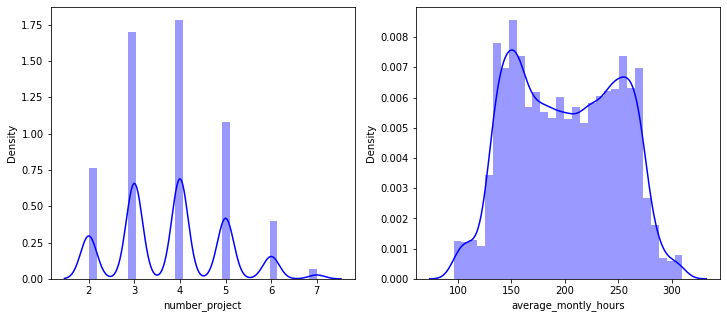

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df.number_project,color="b");
plt.subplot(122)
sns.distplot(df.average_montly_hours,color="b");


# min max scaler

In [27]:
need = ['number_project','average_montly_hours','time_spend_company']
scaler = MinMaxScaler()
df_num=scaler.fit_transform(df_cleaned[need])
df_num=pd.DataFrame(data=df_num)


In [28]:
def change_name_columns(df_old):
    need = ['number_project','average_montly_hours','time_spend_company']
    df_old.columns=need
    return df_old
df_num=change_name_columns(df_num)
df_num.head()

,number_project,average_montly_hours,time_spend_company
0,0.0,0.285047,0.125
1,0.6,0.775701,0.500
2,1.0,0.822430,0.250
3,0.6,0.593458,0.375
4,0.0,0.294393,0.125


In [31]:
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,left
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0,1


In [32]:
df_cleaned[need]=df_num

In [33]:
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,left
0,0.38,0.53,0.0,0.285047,0.125,0,0,1,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,0.6,0.775701,0.500,0,0,2,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,1.0,0.822430,0.250,0,0,2,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,0.6,0.593458,0.375,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,0.0,0.294393,0.125,0,0,1,0,0,0,0,0,0,1,0,0,1


# balancing data

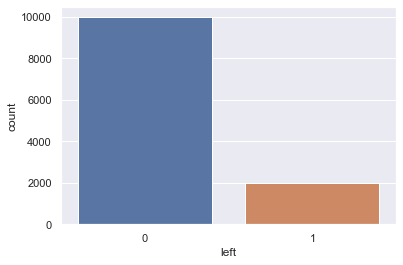

In [42]:
sns.set_theme(style="darkgrid")
x=df_cleaned['left']
ax = sns.countplot(data=df_cleaned,x='left')

# feature selection

<AxesSubplot:>

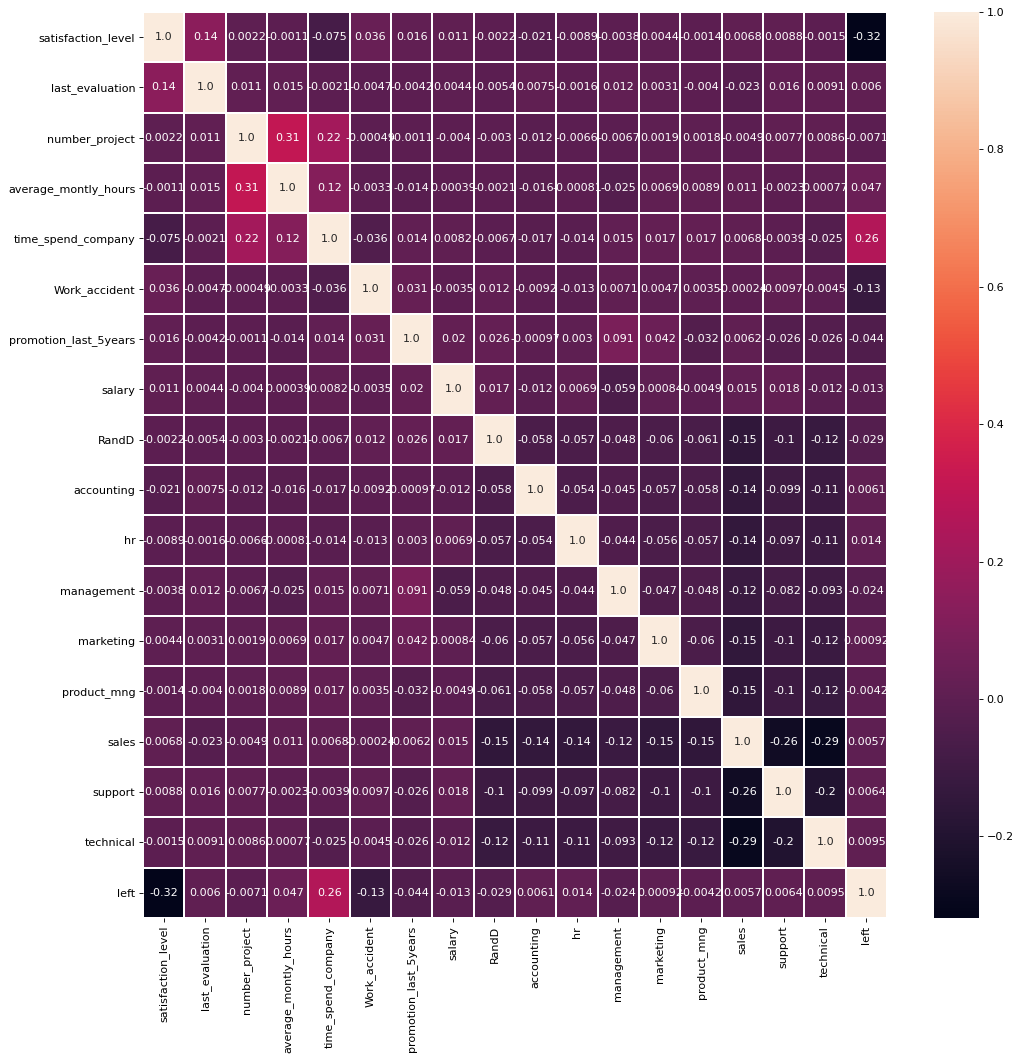

In [37]:
corr=df_cleaned.corr(method='spearman')
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(corr, annot=True , fmt=".2" ,linewidths=.9)

In [34]:
X=df_cleaned.drop("left",axis=1)
y=df_cleaned.left

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9570, 17)
(2393, 17)
(9570,)
(2393,)
